In [1]:
#Importing required libraries
import numpy as np

In [4]:
import tensorflow as tf

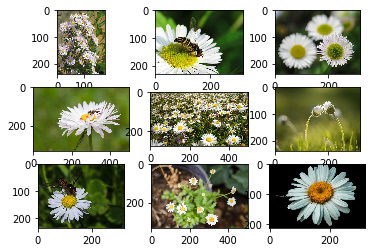

In [5]:
# plot daisy photos from the dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'training_set/daisy/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'daisy' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

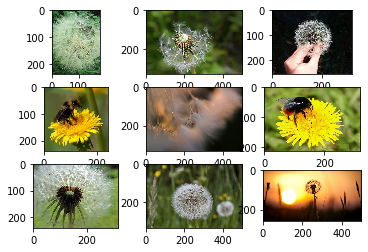

In [6]:
# plot dandelion photos from the dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder2 = 'training_set/dandelion/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder2 + 'dandelion' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

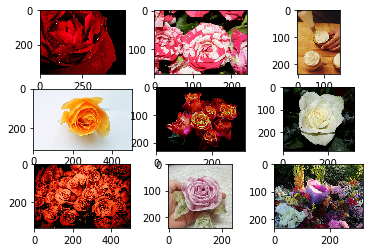

In [61]:
# plot rose photos from the dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder3 = 'training_set/rose/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder3 + 'rose' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

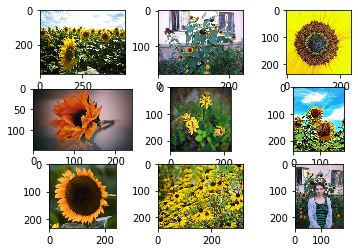

In [7]:
# plot sunflower photos from the dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder4 = 'training_set/sunflower/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder4 + 'sunflower' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

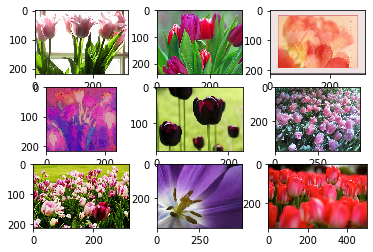

In [8]:
# plot tulip photos from the dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder5 = 'training_set/tulip/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder5 + 'tulip' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [10]:
#
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [11]:
#
training_set = train_datagen.flow_from_directory('training_set', target_size=(64, 64),batch_size=32, class_mode='categorical')

Found 2939 images belonging to 5 classes.


In [12]:
#
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1378 images belonging to 5 classes.


In [13]:
# Initalize CNN
cnn = tf.keras.models.Sequential()

In [15]:
# Add a convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))

In [16]:
# Add max pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
# Add 1 more convolution layers
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))

In [18]:
# Add max pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [19]:
#Prevent Overfitting by using dropout function
cnn.add(tf.keras.layers.Dropout(0.5))

In [20]:
#Converting the inputs to one dimensional
cnn.add(tf.keras.layers.Flatten())

In [21]:
# Add full connection using relu activation
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
# Add full connection using softmax activation
cnn.add(tf.keras.layers.Dense(units=5 , activation='softmax'))

In [23]:
# Compiling the ANN
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [25]:
#Fit cnn to the images
History=cnn.fit(x = training_set , validation_data = test_set , epochs = 30)

Epoch 1/30
92/92 [==============================] - 99s 1s/step - loss: 1.3081 - acc: 0.4525 - val_loss: 1.6187 - val_acc: 0.3374
Epoch 2/30
92/92 [==============================] - 64s 700ms/step - loss: 1.0365 - acc: 0.5985 - val_loss: 1.3605 - val_acc: 0.4478
Epoch 3/30
92/92 [==============================] - 69s 752ms/step - loss: 0.9225 - acc: 0.6536 - val_loss: 1.4159 - val_acc: 0.4035
Epoch 4/30
92/92 [==============================] - 68s 734ms/step - loss: 0.8330 - acc: 0.6863 - val_loss: 1.4496 - val_acc: 0.4332
Epoch 5/30
92/92 [==============================] - 66s 715ms/step - loss: 0.7791 - acc: 0.7186 - val_loss: 1.6784 - val_acc: 0.4187
Epoch 6/30
92/92 [==============================] - 71s 774ms/step - loss: 0.7498 - acc: 0.7203 - val_loss: 1.1150 - val_acc: 0.5399
Epoch 7/30
92/92 [==============================] - 71s 776ms/step - loss: 0.6951 - acc: 0.7400 - val_loss: 1.3559 - val_acc: 0.5087
Epoch 8/30
92/92 [==============================] - 63s 687ms/step - los

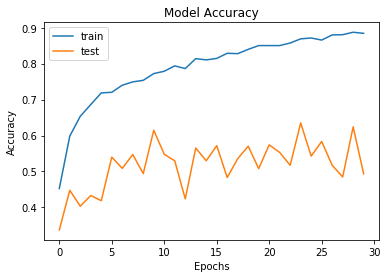

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

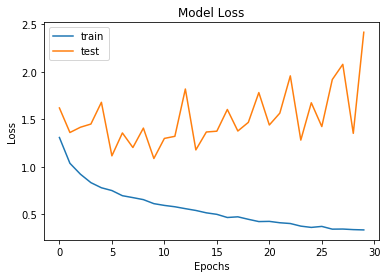

In [27]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
from keras.preprocessing import image

In [40]:
test_image = image.load_img('Prediction/tulip.jpg',target_size=(64,64))

In [41]:
test_image = image.img_to_array(test_image)

In [42]:
test_image = np.expand_dims(test_image,axis=0)

In [43]:
result = cnn.predict(test_image)
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [44]:
if result[0][0]==1:
    print('Daisy')
elif result[0][1]==1:
    print('Dandelion')
elif result[0][2]==1:
    print('Rose')
elif result[0][3]==1:
    print('SunFlower')
elif result[0][4]==1:
    print("Tulip")

Tulip


In [45]:
print(result)

[[0. 0. 0. 0. 1.]]
